In [2]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

In [3]:
class BMIState(TypedDict):
    """State for the BMI calculation."""
    weight: float  # Weight in kilograms
    height: float  # Height in meters
    bmi: float     # Body Mass Index
    catagory : str  # BMI category

In [4]:
def calculate_bmi(state:BMIState) -> BMIState:
    """Calculate the BMI based on weight and height."""
    weight = state['weight']
    height = state['height']
    bmi = weight / (height ** 2)
    state['bmi'] = round(bmi, 2)
    return state

In [5]:
def lable_catagory(state:BMIState) -> BMIState:
    """Label the BMI category based on the calculated BMI."""
    bmi = state['bmi']
    if bmi < 18.5:
        state['catagory'] = 'Underweight'
    elif 18.5 <= bmi < 24.9:
        state['catagory'] = 'Normal weight'
    elif 25 <= bmi < 29.9:
        state['catagory'] = 'Overweight'
    else:
        state['catagory'] = 'Obesity'
    return state

In [6]:
graph = StateGraph(BMIState)
graph.add_node("calculate_bmi", calculate_bmi)
graph.add_node("lable_catagory", lable_catagory)

graph.add_edge(START, 'calculate_bmi')
graph.add_edge('calculate_bmi', 'lable_catagory')
graph.add_edge('lable_catagory', END)


app = graph.compile()

In [9]:
intial_state = BMIState(weight=70.0, height=1.75, bmi=0.0, catagory='')
result = app.invoke(intial_state)
print("result:", result)

result: {'weight': 70.0, 'height': 1.75, 'bmi': 22.86, 'catagory': 'Normal weight'}


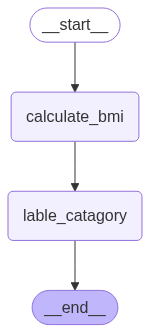

In [ ]:
from IPython.display import display, Image
display(Image(app.get_graph().draw_mermaid_png()))